## Climate Analysis and Exploration

In [23]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [25]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

In [26]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [27]:
# Assign the measurement and station classes to a variable called `Measurement` & `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create a session
session = Session(engine)

In [29]:
# Display the row's columns and data in dictionary format (first row)
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2402eb36710>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [30]:
# Display the row's columns and data in dictionary format (first row)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2402f3189b0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

Precipitation Analysis

In [31]:
# * Design a query to retrieve the last 12 months of precipitation data.
# * Select only the `date` and `prcp` values.
### BEGIN SOLUTION

year_averages = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > "2016-08-23").\
    order_by(Measurement.date).all()
### END SOLUTION
# year_averages

In [32]:
# * Load the query results into a Pandas DataFrame and set the index to the date column.
# * Plot the results using the DataFrame `plot` method.
# * Use Pandas to print the summary statistics for the precipitation data.
df_year_avg = pd.DataFrame(year_averages)
df_year_avg.set_index(df_year_avg['date'], inplace=True)
# df_year_avg = df_year_avg.set_index
df_year_avg.head()


,date,prcp
date,,
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15
2016-08-24,2016-08-24,2.28
2016-08-24,2016-08-24,1.22
2016-08-24,2016-08-24,2.15


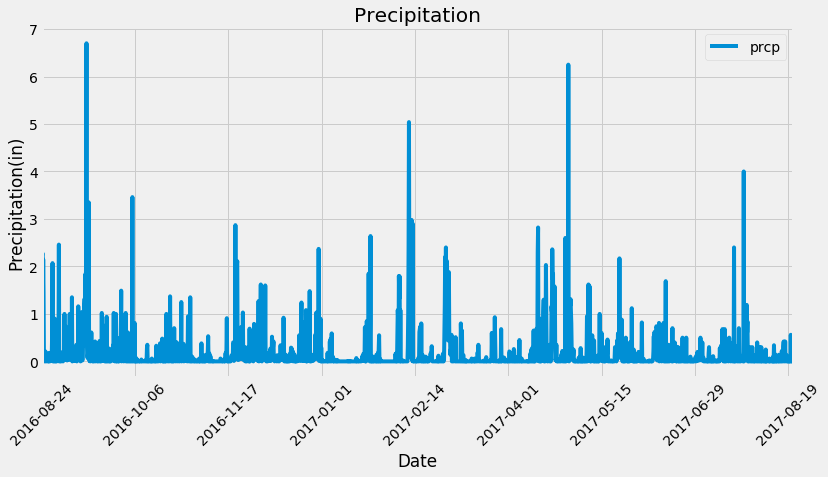

In [33]:
df_year_avg.plot('date', 'prcp', figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Precipitation(in)")
plt.title("Precipitation")
plt.xticks(rotation=45)
plt.show()

Station Analysis

In [45]:
# Query to calculate the total number of stations
# Counting and grouping operations in SQLAlchemy
locations = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are",locations,"stations.")

There are 9 stations.


In [60]:
# Query to find the most active stations.
# Listing the stations and observations counts in descending order
active_stations = session.query(func.count(Measurement.tobs),Measurement.station).\
    group_by(Measurement.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > "2016-08-23").\
    order_by(func.count(Measurement.tobs).desc()).all()
print(active_stations)

[(358, 'USC00519397'), (351, 'USC00519281'), (342, 'USC00513117'), (327, 'USC00516128'), (313, 'USC00519523'), (264, 'USC00514830'), (60, 'USC00517948')]


In [67]:
obs_data = session.query(Measurement.tobs, Measurement.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > "2016-08-23").\
    filter(Measurement.tobs == active_stations[0]).\
    order_by(Measurement.tobs).all()
    #     filter(Measurement.station == (active_stations[0][0:2])).\

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 2 - probably unsupported type. [SQL: 'SELECT measurement.tobs AS measurement_tobs, measurement.station AS measurement_station \nFROM measurement \nWHERE strftime(?, measurement.date) > ? AND measurement.tobs = ? ORDER BY measurement.tobs'] [parameters: ('%Y-%m-%d', '2016-08-23', (358, 'USC00519397'))]

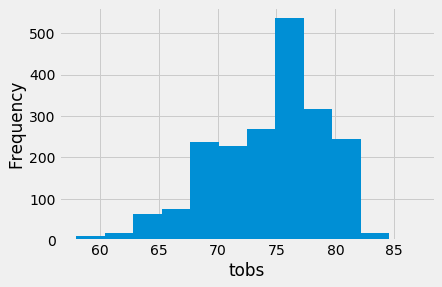

In [66]:
tobs_df = pd.DataFrame(obs_data)
data= tobs_df['tobs']

thing2 = data.hist(bins=12)
thing2.set_ylabel("Observation Frequency")
thing2.set_xlabel('tobs')
plt.title('')

plt.show()

In [19]:
a_stations = pd.DataFrame(active_stations)
a_stations['station'].value_counts()

USC00519397    358
USC00519281    351
USC00513117    342
USC00516128    327
USC00519523    313
USC00514830    264
USC00517948     60
Name: station, dtype: int64

In [20]:
a_stations = [result[1] for result in active_stations[:10]]
# totals = [int(result[2]) for result in active_stations[:10]]

In [21]:
# # horizontal bar chart and plot the emoji_id on the y axis and the 

# fig, ax = plt.subplots()
# ypos = range(1, len(count)+1)
# ax.barh(ypos, count[::-1])
# ax.set_xlabel("observation counts")
# ax.set_ylabel("stations")
# ax.set_yticks(ypos)
# ax.set_xtickslabels(a_stations[::-1])
# ax.set_title("Station totals")
# fig.tight_layout()
# fig.show()

NameError: name 'count' is not defined

In [22]:
df = pd.DataFrame(results[:10], columns=[''])
df.set_index('', inplace=True)
df.head(10)

NameError: name 'results' is not defined

In [23]:
df.iloc[::-1].plot.barh(title="station observation")
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [ ]:
stmt = session.query(Measurement).\
    order_by(Measurement.station.desc()).statement
df2 = pd.read_sql_query(stmt, session.bind)
df2.head(10)

In [ ]:
# Query to find the most active stations.
# List the stations and observations counts in descending order
# Which station has the highest number of observations?

In [ ]:
# Design a query to retrieve the last 12 months of temp obs data(tobs)
# Filter by the station with the highest number of observations
# Plot the results as a histogram with `bins=12`


Temperature Analysis

In [24]:
# Write a function called `calc_temps` that will accept a start date and end
# date in the format `%Y-%m-%d` and return the minimum, average, and 
# maximum temperatures for that range of dates
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# Use the `calc_temps` function to calculate the min, avg, and max 
# temperatures for your trip using the matching dates from the 
# previous year (i.e. use "2017-01-01" if your trip start date 
# was "2018-01-01")
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs),
    func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62, 69.3921568627451, 74)]


In [26]:
import numpy as np
data = list(np.ravel(calc_temps('2012-02-28', '2012-03-05')))
data

[62.0, 69.392156862745097, 74.0]

<IPython.core.display.Javascript object>


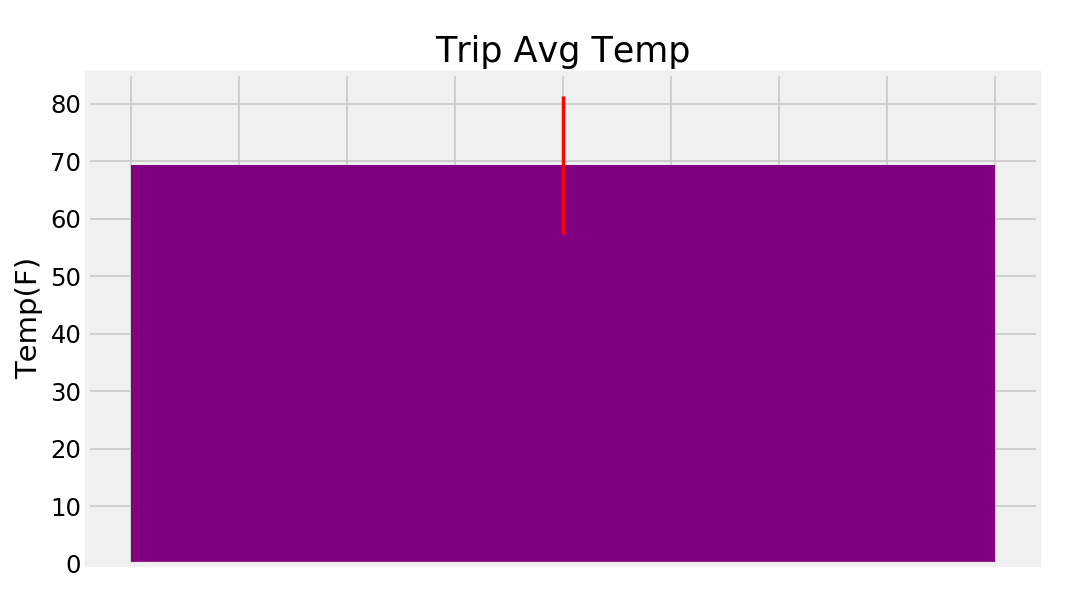

In [32]:
# Plot the min, avg, and max temperature from your previous 
# query as a bar chart.
#    Use the average temperature as the bar height.
#    Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
plt.bar(np.arange(1), data[1],
       color='purple',
       yerr=(data[2] - data[0]),
       error_kw=dict(elinewidth=2,ecolor='red'))
plt.tick_params(
   axis='x',          # changes apply to the x-axis
   which='both',      # both major and minor ticks are affected
   bottom='off',      # ticks along the bottom edge are off
   top='off',         # ticks along the top edge are off
   labelbottom='off') # labels along the bottom edge are off
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.show()

Optional Recommended Analysis

<IPython.core.display.Javascript object>


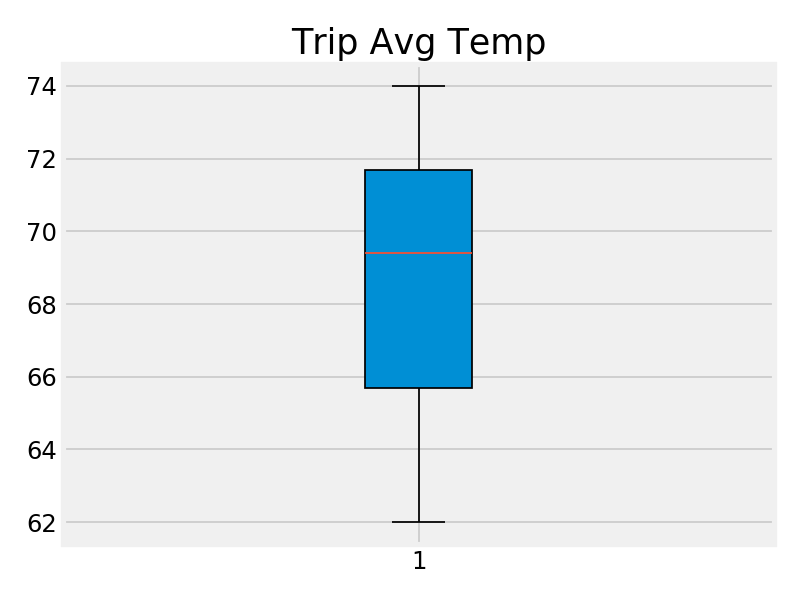

In [34]:
import numpy as np

fig, ax = plt.subplots()

x = range(len(data))
ax.boxplot(data, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
fig.show()

In [ ]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

In [ ]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

In [ ]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
hawaii = Base.classes.measurement

In [ ]:
session = Session(engine)

In [ ]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name
### BEGIN SOLUTION
avg_prcp = [Measurement.date, func.avg(Measurement.prcp)] 
year_averages = session.query(*avg_prcp).\
    filter(func.strftime("%Y", Measurement.date) == "2016").\
    group_by(Measurement.prcp).\
    order_by(Measurement.date).all()
### END SOLUTION
year_averages